# Algoritmos de búsqueda informada

**Introducción a la inteligencia artificial. <br>
Universidad Nacional de Colombia <br>
2022-02**

**Daniel Estevan Garcia Niño <br>
Jaime Andres Macias Sanchez <br>
Santiago Tovar Mosquera**

## 1. Qué es una heurística

"La heurística es una función, denotada por $h(n)$, que estima el costo de la ruta más barata desde el estado en el nodo $n$ hasta el estado objetivo" [2] en un algoritmo de búsqueda informada. Da una "pista" de qué tan alejado está el agente del estado objetivo dado el estado actual. Pero para entender mejor, recuerde qué contiene un nodo en la implementación de los algoritmos de búsqueda:

1. Estado en el que se encuentra (dado por la descripción del problema).
2. Nodo padre del cual procede.
3. Acción que realizó el agente para pasar del nodo padre al nodo actual.
4. Costo que tuvo la acción anterior.

Luego, la heurística $h(n)$ más que actuar sobre el nodo $n$ actua sobre el estado del nodo. Los valores $h(n)$ no se calculan a partir de la descripción del problema en sí, por lo que es necesario cierto conocimiento del entorno para poder brindar la información a priorí. 

### Aterrizando el concepto

En el caso del laberinto, una heurística es una función que toma como argumento el estado del nodo actual (posición $(x_a,y_a)$ del agente en el laberinto) y da una pista de cuán lejos está del objetivo $(alto\_laberinto, ancho\_laberinto-1)$. Por ejemplo:

El estado objetivo es: 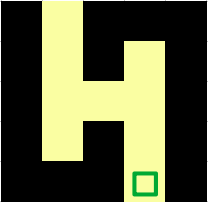 y dado un nodo $n$ con estado igual a: 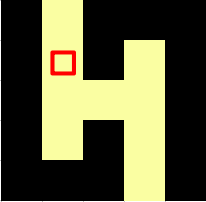 la función $h$ da una pista de la distancia entre ambos estados: 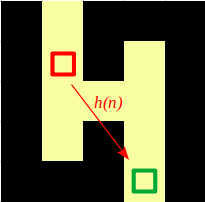

EL trazo de la línea se realizó con ánimo de mostrar que $h$ no depende de la descripción que se haga del problema.

### Ejemplos de heurísticas en laberintos

AL momento de cargar el laberinto, tenemos claro el lugar de comienzo del agente (así mismo los estados por los que pasa) y el estado objetivo. Información suficiente para poner coordenadas al tablero y calcular distancia entre coordenadas. Así, podemos pensar en dos tipos de heurísticas:

1. $h:$ distancia de euclidiana. 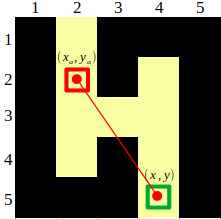 Donde para un estado dado $n$ obtenemos la coordenada del agente $(x_a, y_a)$ y sabiendo la coordenada del estado objetivo $(x, y)$ calculamos $h(n)=\sqrt{(x_a-x)^2+(y_a-y)^2}$.
2. $h:$ distancia de manhattan. 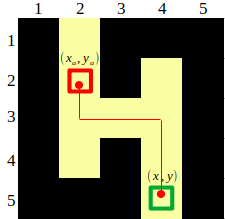 Donde calculamos $h(n)=|x_a-x|+|y_a-y|$.

Con una heurística como las anteriores, y dado un nodo en el árbol de búsqueda, se puede saber qué tan lejos se está del objetivo y actuar conforme a dicha información. Puede que no se encuentre el camino óptimo, sin embargo encontrará el camino más corto respecto a la heurística (recordemos que no depende de la descripción del problema).

## 2. Algoritmo de búsqueda greedy

De manera sucinta, este algoritmo es una forma particular del algoritmo *Mejor-primera búsqueda*, que hace uso de una heurística y donde $f(n)=h(n)$. Recuerde que la *Mejor-primera búsqueda* expande los sucesores de un nodo según una función de peso $f(n)$ como lo haría una cola de prioridad. Es decir, para el algoritmo *Greedy* y dado un nodo padre, se expandiran los sucesores de un nodo hijo si este es el más cercano al objetivo según la heurística entre  todos los nodos hijos.

### Estrategia de exploración y frontera

Depende de los valores de la heurística $h$. Para el caso del laberinto, preferimos valores menores de $h(n)$ para escoger el camino. Por ejemplo, si consideramos $h:$ distancia de manhattan: 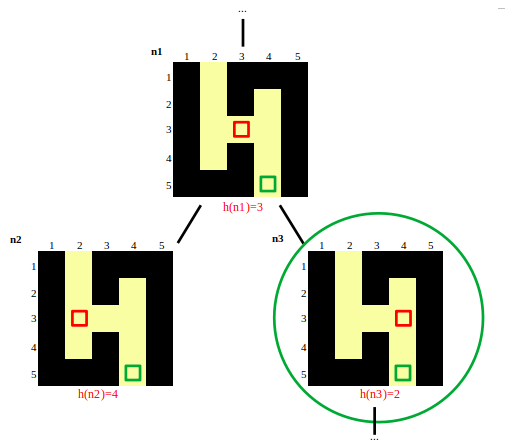

dado el nodo $n_1$ como nodo padre y desplegados sus nodos hijos ($n_2$ y $n_3$), el algoritmo desplegará el nodo hijo cuya heurística sea menor (lo que implica mayor cercanía con el objetivo). En este caso, el nodo $n_3$ es más cercano en términos de $h(n)$ al estado objetivo y se expandirá este nodo.

La frontera está dada por los nodos exteriores (no desplegados) u hojas del árbol, localizados en cualquier nivel del árbol y guardando su respectivo valor $h(n)$. Es fácil representarlos con la estructura de datos *montículo mínimo*, que permite localizar fácilmente el valor mínimo entre todos los $h(n)$.

## 3. Algoritmo A*

De manera resumida y al igual que el algoritmo *Greedy*, este algoritmo es una forma particular del algoritmo *Mejor-primera búsqueda*, que también hace uso de una heurística pero en donde $f(n)=g(n)+h(n)$. Donde $g(n)$ es el costo del camino desde el estado inicial al nodo $n$ y $h(n)$ costo estimado del camino más corto desde $n$ hasta el estado objetivo.

### Estrategia de exploración y frontera

Análogo al algoritmo *Greedy*, expandimos nodos según el valor de $f(n)$ que más nos convenga. De nuevo, en nuestro problema del laberinto, con $h:$ distancia de manhattan y costo igual a $1$ por acción, tenemos: 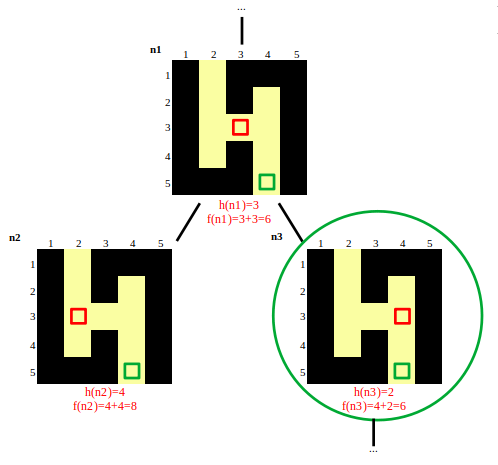 

El costo de llegar al nodo $n_1$ es de $3$, suponiendo inicio en $(1, 2)$ y que no pasó por las coordenadas $(4, 2)$ haciendo un camino directo. Suponga además que es el nodo con menor $f(n)$ del momento, se realiza su expanción en los nodos $n_2$ y $n_3$. Para $n_2$ el coste es de $4$ pues hubo una acción nueva de coste $1$ para llegar a él (análogo para $n_3$). Sin embargo $h(n_3)<h(n_2)\Rightarrow f(n_3)<f(n_2)$ y permitiendo así que el algoritmo expanda el nodo $n_3$.

La representación de la frontera es igual al algoritmo *Greedy*, solo cambian los valores del montículo de $h(n)$ a la nueva función $g(n)+h(n)$.

## 4. Teorema (A* admisible)

### Heurística admisible

Primero entendamos qué es una heurística admisible. **Decimos que $h(n)$ es admisible si nunca sobrestima el costo de alcanzar una meta**. En nuestro ejemplo 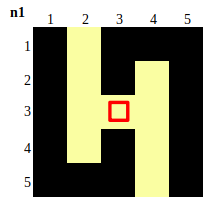

sabemos que el costo para alcanzar la meta desde $n_1$ es $3$. $h(n)$ es admisible (en este ejemplo) si $h(n_1)\leq 3$. En general, $h(n)$ es admisible si para cualquier nodo $n$ y el costo $c(n,n_{obj})$ (ir desde $n$ al nodo objetivo $n_{obj}$), se cumple $h(n)\leq c(n, n_{obj})$. En este sentido y para el problema del laberinto, si $h$ distancia ecuclidiana o de manhattan, entonces $h$ admisible.

### Demostración del teorema. Si la función heurística utilizada por A* es admisible, entonces A* es admisible.

*Un algoritmo de búsqueda se dice admisible si tiene garantía de retornar una solución
óptima*.

Presentamos la demostración dada en [2] al detalle. Por reducción al absurdo, suponga que la heurística usada por A* es admisible pero A* no es admisible. Es decir, dado el costo del camino óptimo $C^*$ el algoritmo retorna un camino con costo $C>C^*$. Esto indica que existe algún nodo $n$ que pertenece al camino óptimo pero que no fue expandido en el algoritmo de búsqueda (pues si todos los nodos del camino óptimo hubiesen sido expandidos, A* necesariamente hubiera retornado el camino optimo argumentando que usa una $h$ admisible). 

Sea $g^*(n)$ el costo del camino óptimo desde el nodo inicial al nodo $n$, y $h^*(n)$ el costo del camino optimo desde $n$ hasta la meta más cercana. Tenemos:

\begin{align}
&f(n) > C^*& \text{(de otra forma $n$ se ubiese expandido)} \\
&f(n) = g(n)+h(n)& \text{(definición de la función de peso en A*)} \\
&f(n) = g^*(n)+h(n)& \text{($n$ en el camino óptimo, luego su coste es igual al coste del camino óptimo hasta ese nodo)} \\
&f(n) \leq g^*(n)+h^*(n)& \text{(pues $h(n)$ admisible, luego no sobrestima el coste de llegar a la meta $h^*(n)$)} \\
&f(n) \leq C^*& \text{(por definición de $C^*=g^*(n)+h^*(n)$)}
\end{align}

Tenemos $f(n)>C^*$ y $f(n)\leq C^*$ (contradicción). La contradicción es derivada de suponer A* no admisible, por lo tanto A* es admisible.

## 5. Dechter y Pearl

### Heurística consistente

Una heurística h(n) es consistente si para todo nodo $n$ y cada nodo sucesor $n'$ de $n$ generado por una acción $a$, tenemos:

$$h(n) \leq c(n,a,n')+h(n')$$

Y representa una forma particular de la desigualdad triangular. Un ejemplo en el problema de los laberintos es la heurística $h:$ Distancia eculidiana, pues esta distancia es una métrica en el espacio coordenado $\mathbb{R}^2$ y cumple con la desigualdad triangular (los costos no afectan esta propiedad, pues recuerde que cada acción tiene costo $1$ y puede ser tratado como un cambio en una de las coordenadas de $\mathbb{R}^2$). Para ejemplificar, considere:

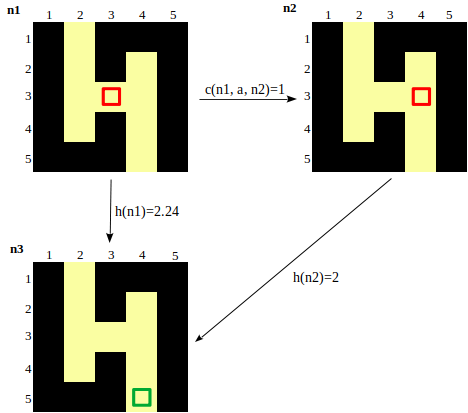 Donde $a:$ "*desplace un espacio a la derecha*". Vea que $2.24=h(n_1)\leq c(n_1, a, n_2)+h(n_2)=1+2=3$.

### Ejemplo de heurística admisible pero no consistente

Considere los siguientes nodos y costo usual en el problema de laberintos: 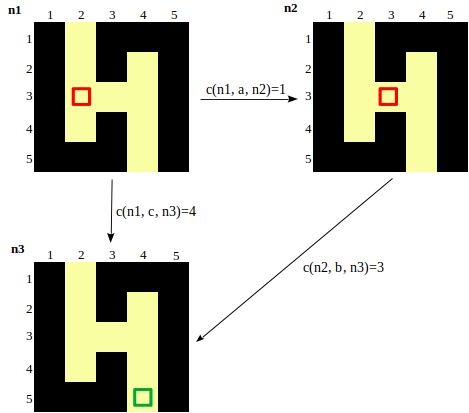

Donde $a,b$ y $c$ son las secuencias de acciones para poder llegar al respectivo nodo. Para que la heurística $h(n)$ sea **admisible**, necesariamente debemos tener:

$$
h(n_1)\leq 4 \\
h(n_2)\leq 3 \\
h(n_3)\leq 0 
$$

Y para que sea **consistente**, necesariamente:

\begin{align}
h(n_3) &= 0 \\
h(n_1) &\leq c(n_1,a,n_2)+h(n_2)=1+h(n_2) \\
h(n_2) &\leq c(n_2,b,n_3)+h(n_3)=3
\end{align}

Como $h(n_2)\leq 3$ por admisibilidad, entonces debemos tener $h(n_1)>1+h(n_2)$ para no tener consistencia. Luego, cualquier $h(n)$ que satisfaga:

\begin{align}
h(n_1) &> 1+h(n_2) \\
h(n_2) &\leq 3 \\
h(n_3) &= 0
\end{align}

es admisible pero no consistente. Por ejemplo, considere:

\begin{align}
h(n)= \left\{ \begin{array}{ll}
                4  & \mbox{ si } n=n_1; \\
                h'(n) & \mbox{ en otro caso }
              \end{array} \right. \\
\text{Donde $h'(n)$ la distancia euclidiana.}
\end{align}

### Teorema

#### Si A* con una heurística consistente, entonces es óptimamente eficiente con respecto a todos los algoritmos de búsqueda similares a  A* admisibles en todos los problemas de búsuqeda "no patológicos".

Priemero veamos unas definiciones.

Un algoritmo $A$ se dice que **domina** a $B$ relativo al conjunto $ \mathbf{I} $ de instancias de problemas sii en cada instancia $I\in \mathbf{I} $, el conjunto de nodos expandidos por A es un subconjunto del conjunto de nodos expandidos por B.

Un algoritmo $A$ es **optimo sobre una clase** $\mathbf{A}$ de algoritmos sii $A$ domina cada miembro de $\mathbf{A}$.

**Optimalidad de tipo 0**. $A^*$ se dice 0-optimo sobre $\mathbf{A}$ relativo a $\mathbf{I}$ sii, en cada instancia de problema $I \in \mathbf{I}$, $A^*$ expande un subconjunto de nodos expandidos por cualquier miembro de $\mathbf{A}$. 

Definimos los siguientes conjuntos de instancias de problema:
\begin{align}
\mathbf{I}_{AD}=\{\text{Instancias de problema donde $h(n)$ es admisible}\} \\
\mathbf{I}_{CON}=\{\text{Instancias de problema donde $h(n)$ es consistente}\}
\end{align}
Con todas estas definiciones, podemos replantear el teorema de la siguiente forma:

*Cualquier algoritmo que es admisible en $\mathbf{I}_{AD}$ expandirá , en cada insancia $I\in \mathbf{I}_{CON}$, todos los nodos expandidos por $A^*$.*

**Demostración**: Sea $I$ alguna instancia de problema en $\mathbf{I}_{AD}$ y asuma que $n$ es expandido por $A^*$, esto es $n\in N^{C^*}_{g+h}$ (camino optimo encontrado por $A^*$). Luego existe un camino $P_{s-n}$ ($s$ nodo de inicio) tal que:
$$g(n')+h(n')<C^*$$
Para todo $n'\in P_{s-n}$ y con $C^*$ costo del camino optimo.

Sea $B$ un algoritmo compatible con $A^*$, es decir, se detiene con costo en $C^*$ en 1. Asuma que $B$ no expande a $n$. Podemos crear un nuevo árbol de la instancia añadiendo al árbol base un nodo $t$ con $h(t)=0$ y la unión de $n$ a $t$ con costo no negativo $c=h(n)+\Delta$, donde:
$$\Delta=\frac{1}{2}(C^*-D)>0 \text{ y } D=max\left\{f(n')|n'\in N^{C^*}_{g+h}\right\}$$
Esta construcción crea un nuevo camino solución $P^*$ con costo a lo más $C^*-\Delta$, (como $h$ consistente en $I$) retiene la consistencia y admisibilidad de $h$ en la nueva instancia $I'$.

Para la consistencia de $h$ en $I'$, note que no cambiamos los valores de $h$ derivados del árbol original, luego para $I'$ estos valores mantienen la desigualdad triangular en pares de nodos que no involucren a $t$. Solo falta comprobar consistencia con pares de nodos que involucren a $t$. Por reducción al absurdo, si en algún nodo $n'$ tenemos $h(n')>c(n',t)$, entonces deberiamos tener:
$$h(n')>c(n',n)+c=c(n', n)+h(n)+\Delta$$
Que viola la consistencia de $h$ en $I$. Así concluimos que $I'\in \mathbf{I}_{CON}$.

En el nuevo árbol construído, el algoritmo $A^*$ encontrará el camio extendido $P^*$ con costo $C^*-\Delta$, pues:
$$f(t)=g(n)+c=f(n)+\Delta \leq D+\Delta = C^*-\Delta<C^*$$
$t$ es alcanzable desde $s$ por un camino acotado por $C^*-\Delta$, que asegura su selección.

De nuevo por reducción al absurdo. Suponga que el algoritmo $B$ evita expandir $n$, entonces debe comportarse igual que en la instancia del problema $I$, deteniendose con costo $C^*$, que es mayor que el econtrado por $A^*$. Esto contradice la suposición de las dos sentencias: B es admisible en $I$ y evita la expansión del nodo $n$. Comprobandose el teorema enunciado.

Esta demostración fue desglozada desde la información presentada en [1].

## Referencias

[1] Dechter, Rina; Judea Pearl (1985). *Generalized best-first search strategies and the optimality of
A* *. Journal of the ACM. 32 (3): 505–536.

[2] Russell, S., & Norvig, P. (2020). *Artificial intelligence: A modern approach* (4th ed.). Pearson.